Text(0, 0.5, 'Frequency')

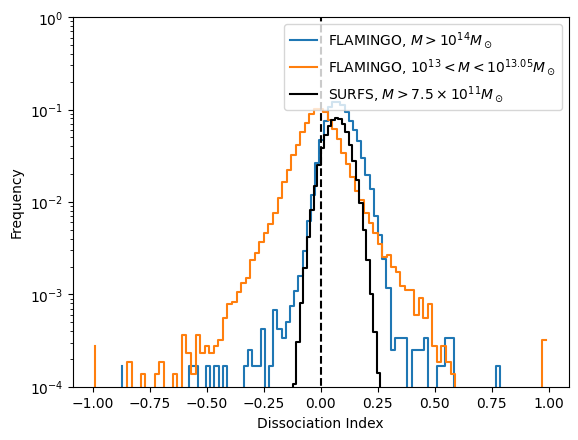

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/S14.hdf5",'r')
S14=np.array(f['S'])
bin14=np.array(f['bin'])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/S13.hdf5",'r')
S13=np.array(f['S'])
bin13=np.array(f['bin'])
f.close()
#print(bin13)
fig=plt.figure()    
ax=fig.add_subplot(111)
bins=np.linspace(-0.2,0.4,40)
ax.plot(bin14,S14,label=r"FLAMINGO, $M>10^{14}M_\odot$",drawstyle='steps')
ax.plot(bin13,S13,label=r"FLAMINGO, $10^{13}<M<10^{13.05}M_\odot$",drawstyle='steps')
ax.plot(bins,0.08190315*np.exp(-(bins-0.078895)**2/2/0.0512119**2),label=r"SURFS, $M>7.5\times 10^{11}M_\odot$",color='k',drawstyle='steps')
ax.legend()

ax.set_yscale("log")
ax.set_xlabel("Dissociation Index")
ax.vlines(0,10**-5,1000,linestyle='--',color='k')
ax.set_ybound(10**-4,1)
#ax.set_xbound(-0.5,0.5)
ax.set_ylabel("Frequency")